In [110]:
import pandas as pd
import numpy as np


# Read Dataset From CSV

In [111]:
df = pd.read_csv("./dataset.csv")
df.shape

(545, 13)

In [112]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [154]:

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<Axes: xlabel='area', ylabel='price'>

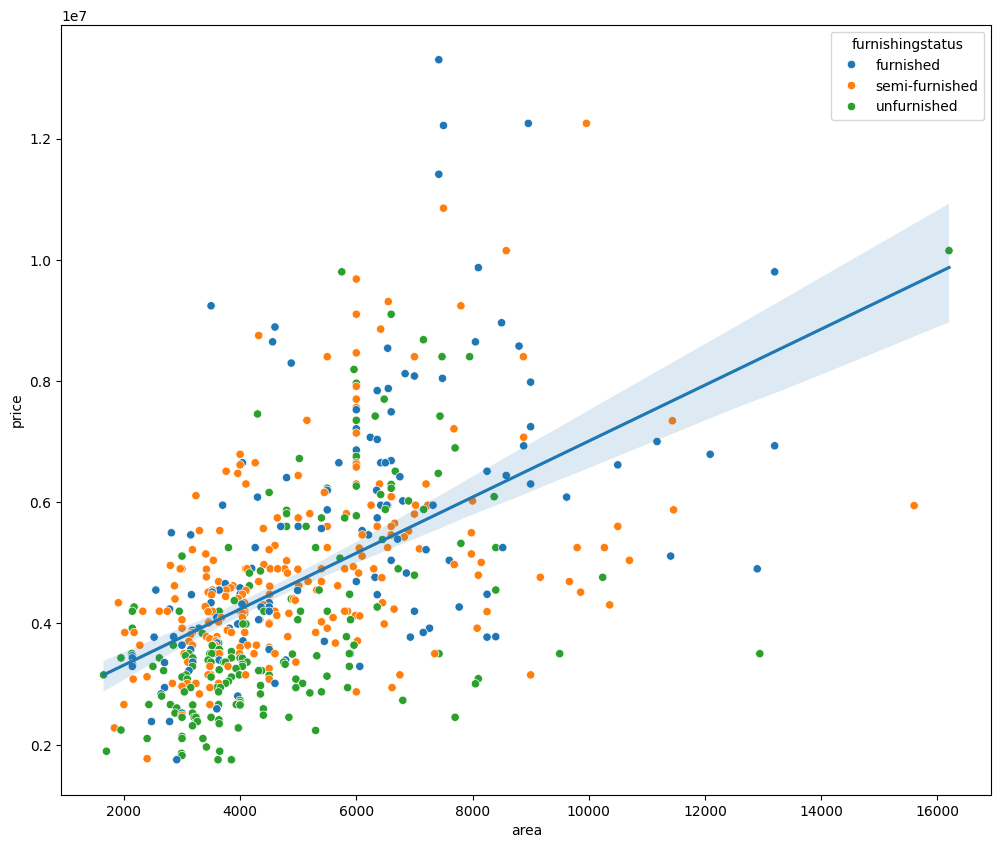

In [148]:

#scatter and regression plot for price
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(12,10))
sb.scatterplot(x='area',y='price',data=df,hue='furnishingstatus')
sb.regplot(x='area',y='price',data=df,scatter=False)


<Axes: >

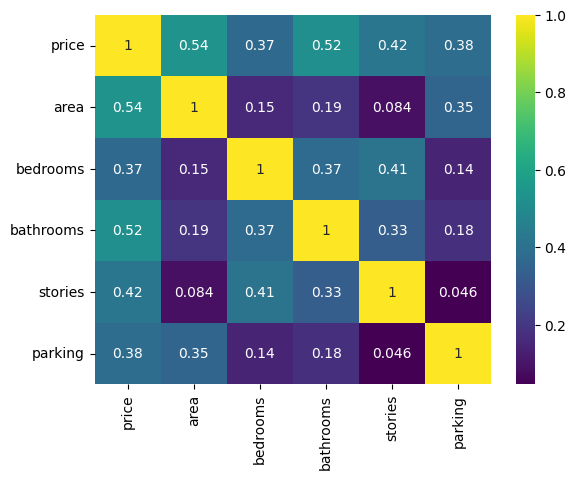

In [152]:
#creating dataset with categorical value
cat=df.select_dtypes(exclude='int')
cat.columns
#checking correlation with heatmap
num_data=df.drop(cat.columns,axis=1)
cor=num_data.corr()
sb.heatmap(cor,annot=True,cmap='viridis')

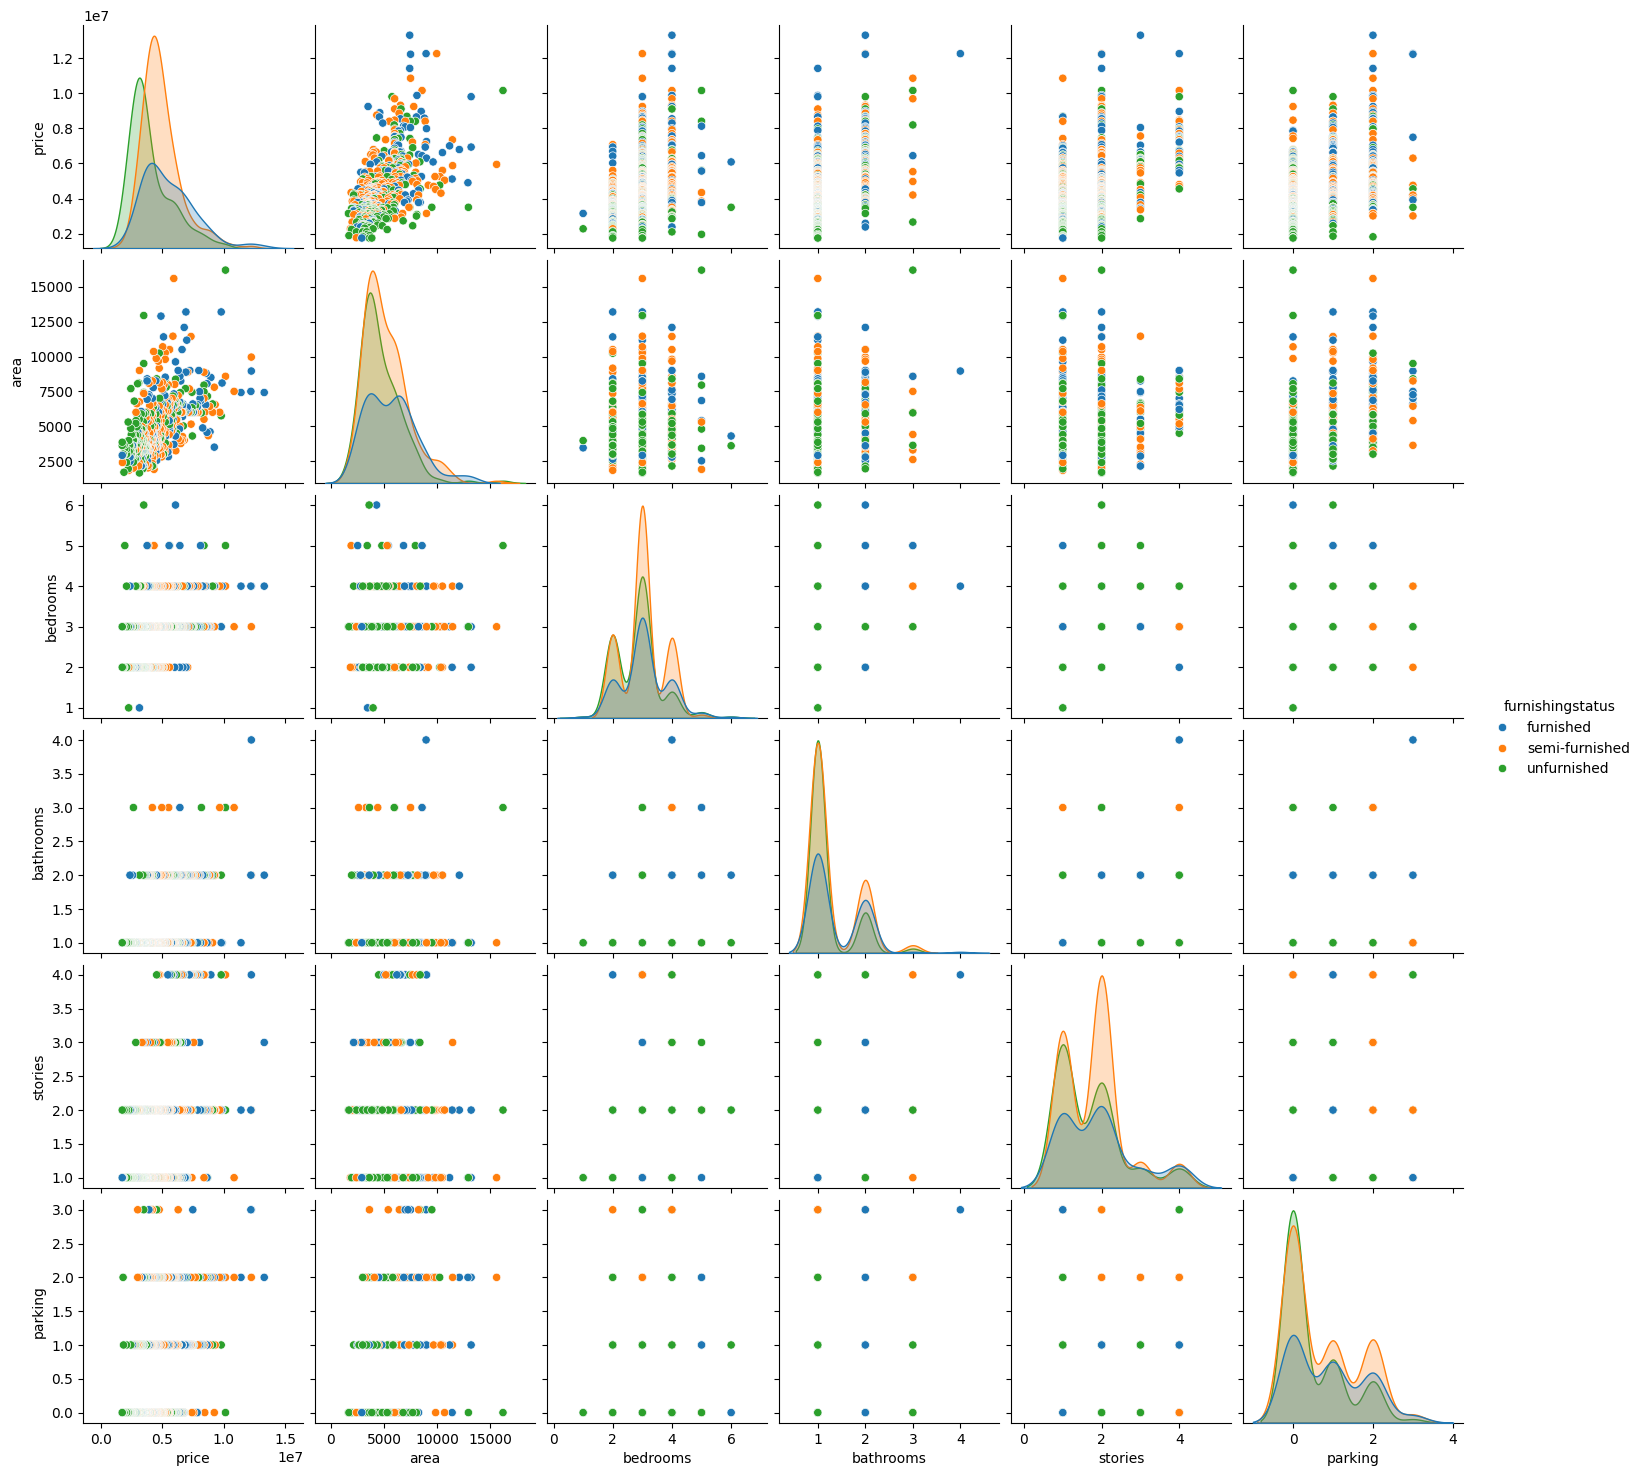

In [153]:
#pairplot for data
sb.pairplot(df,hue='furnishingstatus')

# Preprocess

In [114]:
#checking for null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [115]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [116]:
df['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [117]:
x = df.drop("price",axis=1)
y = df["price"]
x

x["mainroad"]=x["mainroad"].map({'yes':1, 'no':0})
x["guestroom"]=x["guestroom"].map({'yes':1, 'no':0})
x["basement"]=x["basement"].map({'yes':1, 'no':0})
x["hotwaterheating"]=x["hotwaterheating"].map({'yes':1, 'no':0})
x["airconditioning"]=x["airconditioning"].map({'yes':1, 'no':0})
x["prefarea"]=x["prefarea"].map({'yes':1, 'no':0})
x["furnishingstatus"]=x["furnishingstatus"].map({'furnished':1, 'semi-furnished':2, 'unfurnished':3})
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,1
1,8960,4,4,4,1,0,0,0,1,3,0,1
2,9960,3,2,2,1,0,1,0,0,2,1,2
3,7500,4,2,2,1,0,1,0,1,3,1,1
4,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,3
541,2400,3,1,1,0,0,0,0,0,0,0,2
542,3620,2,1,1,1,0,0,0,0,0,0,3
543,2910,3,1,1,0,0,0,0,0,0,0,1


In [118]:
x = np.array(x)
y = np.array(y)
x

array([[7420,    4,    2, ...,    2,    1,    1],
       [8960,    4,    4, ...,    3,    0,    1],
       [9960,    3,    2, ...,    2,    1,    2],
       ...,
       [3620,    2,    1, ...,    0,    0,    3],
       [2910,    3,    1, ...,    0,    0,    1],
       [3850,    3,    1, ...,    0,    0,    3]], dtype=int64)

In [119]:
y

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

# Normalize

In [120]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x)
x

array([[0.39656357, 0.6       , 0.33333333, ..., 0.66666667, 1.        ,
        0.        ],
       [0.5024055 , 0.6       , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.57113402, 0.4       , 0.33333333, ..., 0.66666667, 1.        ,
        0.5       ],
       ...,
       [0.13539519, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.08659794, 0.4       , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15120275, 0.4       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [121]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.shape
x_test.shape


(109, 12)

# Linear Regresion


In [127]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(x_train,y_train)

LinearRegression()

In [156]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [170]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame
X = df.drop('price', axis=1)
y = df['price']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1754318687330.6616


In [171]:
r_squared = r2_score(y_test, y_pred)


print(f"R-squared: {r_squared}")

R-squared: 0.6529242642153188
